Mutual Information: Mutual Information is a concept from information theory that measures the amount of information one variable provides about the other.
It quantifies the reduction in uncertainty of one variable based on the knowledge of other, also called as entropy. A variable can have a minimum of 0 entropy while the maximum value can be anything above it. 

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

file_path = r"C:\Users\12368\OneDrive\Desktop\30 days of ML\Dataset\Automobile_data.csv"
df = pd.read_csv(file_path)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [196]:
X = df.copy()

# Since this data frame contains strings like '?', I was getting error computing MI, so I just replaced it with NaN and then dropped these rows
X.replace('?', np.nan, inplace=True)  # Replace '?' with NaN
X = X.dropna(axis=0)
y = X.pop("price")

for cols in X.select_dtypes('object'):
    X[cols], _ = X[cols].factorize()

discrete_features = X.dtypes == int
discrete_features

symboling            False
normalized-losses    False
make                 False
fuel-type            False
aspiration           False
num-of-doors         False
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg             False
highway-mpg          False
dtype: bool

In [197]:
# a function to calculate MI scores
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:5]

curb-weight    0.997567
highway-mpg    0.843434
engine-size    0.793926
width          0.714699
length         0.699752
Name: MI Scores, dtype: float64

Adding a Bar plot to make comparisons easier.

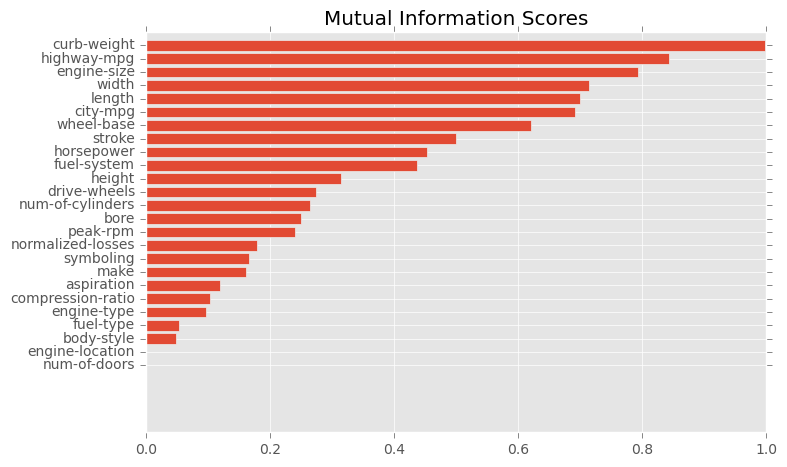

In [218]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

plt.style.use('ggplot')

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [220]:
sns.relplot(="curb_weight", y="price", data=df);

ValueError: Could not interpret value `curb_weight` for `x`. An entry with this name does not appear in `data`.